In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:

df = pd.read_csv(r"C:\Users\adars\Downloads\shopping_behavior_updated.csv")

In [5]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
df.shape

(3900, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [13]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [17]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [20]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [ ]:
df['Purchase Amount (USD)'].value_counts().sum()

In [ ]:
df['Age'].value_counts().max()

In [ ]:
df['Age'].value_counts().min()

In [ ]:
sns.histplot(df['Purchase Amount (USD)'])


In [ ]:
sns.countplot(x='Category', data=df)


In [ ]:
df[df['Category'] == 'Outerwear']['Item Purchased'].unique()

In [ ]:
category_items = df.groupby('Category')['Item Purchased'].unique()
print(category_items)

In [ ]:
list(category_items.loc['Outerwear'])

In [ ]:
category_items.loc['Clothing']

In [ ]:
df[df['Item Purchased']== 'Jeans']['Purchase Amount (USD)'].sum()

In [ ]:
item_totals = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Get total for Laptop
item_totals.loc['Jeans']


In [ ]:
df['Item Purchased'].value_counts().loc['Jeans']

In [ ]:
df[df['Item Purchased'] == 'Jeans'].shape[0]

In [ ]:
item_totals.loc['Sweater']

In [ ]:
df['Item Purchased'].value_counts().loc['Sweater']

In [23]:
df[df['Category'] == 'Clothing'].value_counts().sum()

1737

In [24]:
df[df['Category'] == 'Clothing']['Purchase Amount (USD)'].sum()

104264

In [9]:
category_total = df.groupby('Category')['Purchase Amount (USD)'].count()

In [11]:
category_total.loc['Outerwear']

324

In [27]:
category_total.loc['Clothing']

104264

In [31]:
df[df['Item Purchased'] == 'Blouse'].agg({'Purchase Amount (USD)': ['count', 'mean', 'sum']})

,Purchase Amount (USD)
count,171.000000
mean,60.877193
sum,10410.000000


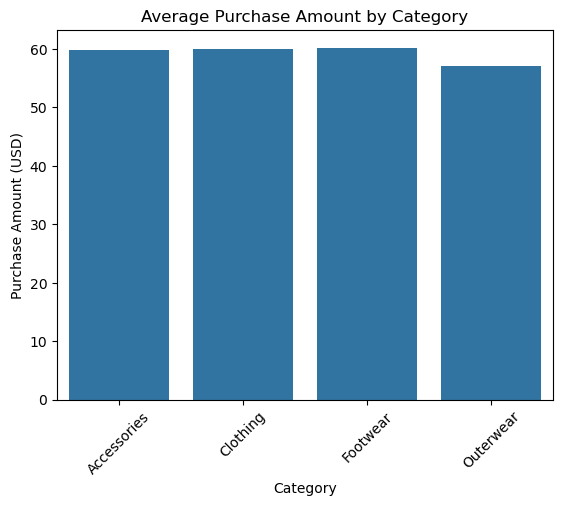

<Figure size 1000x600 with 0 Axes>

In [56]:

category_avg = df.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()

sns.barplot(x='Category', y='Purchase Amount (USD)', data=category_avg)
plt.xticks(rotation=45)
plt.title("Average Purchase Amount by Category")
plt.figure(figsize=(10,6))
plt.show()


In [54]:
category_avg = df.groupby('Category')['Purchase Amount (USD)'].mean()
category_avg

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

C:\Users\adars\AppData\Local\Temp\ipykernel_9224\556473338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette= 'rocket', showmeans=True)


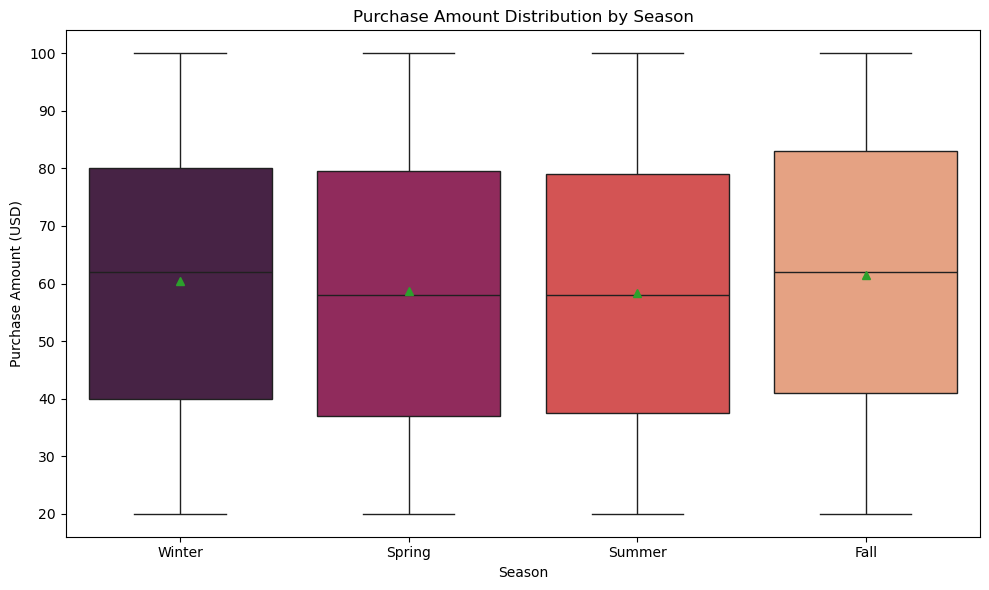

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df, palette= 'rocket', showmeans=True)
plt.title('Purchase Amount Distribution by Season')
plt.tight_layout()
plt.show()

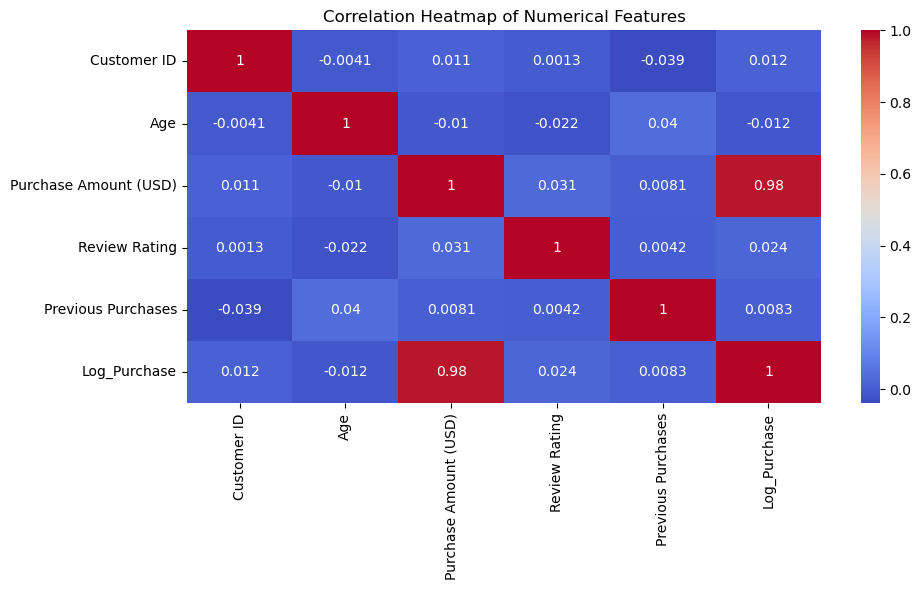

In [50]:
numeric_df = df.select_dtypes(include= np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


### Outliers Detection

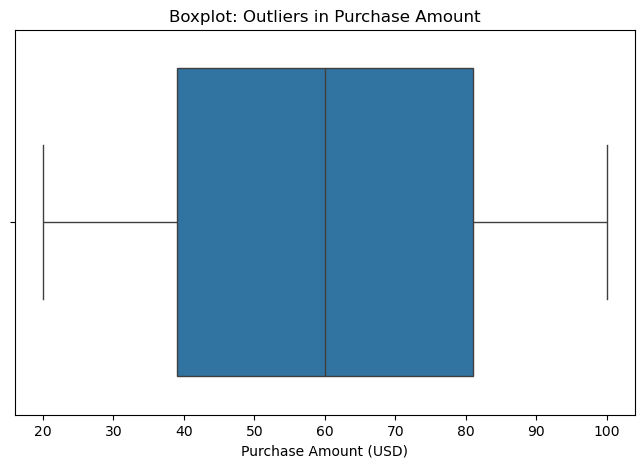

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Boxplot: Outliers in Purchase Amount')
plt.show()


In [58]:
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Purchase Amount (USD)'] < (Q1 - 1.5 * IQR)) | 
              (df['Purchase Amount (USD)'] > (Q3 + 1.5 * IQR))]

print(f"Number of outliers: {len(outliers)}")
outliers.head()


Number of outliers: 0


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Log_Purchase


<Axes: ylabel='Age'>

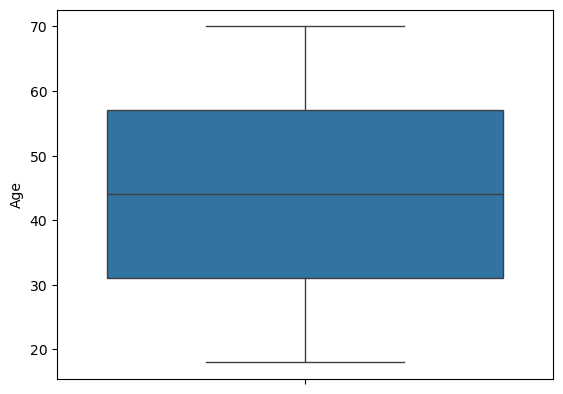

In [60]:
sns.boxplot(df['Age'])


In [62]:
df['Age'].describe()


count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

In [ ]:
df.head(2)

In [ ]:
### eg for outliers

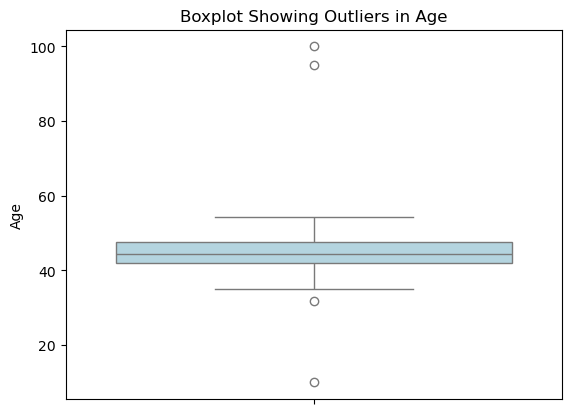

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create fake data
np.random.seed(42)
normal_ages = np.random.normal(loc=45, scale=5, size=100)  # Normal values around 45
outliers = [10, 95, 100]  # Extreme values (outliers)
age_data = np.concatenate([normal_ages, outliers])

# Create DataFrame
df_outliers = pd.DataFrame({'Age': age_data})

# Boxplot
sns.boxplot(y='Age', data=df_outliers, color='lightblue')
plt.title("Boxplot Showing Outliers in Age")
plt.show()


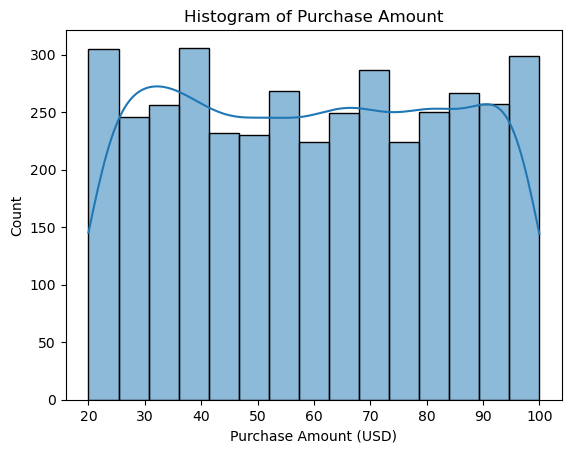

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Purchase Amount (USD)'], kde=True)
plt.title("Histogram of Purchase Amount")
plt.show()


In [97]:
from scipy.stats import shapiro

stat, p = shapiro(df['Purchase Amount (USD)'])
print("Shapiro-Wilk p-value:", p)

if p > 0.05:
    print("Likely normal")
else:
    print("Likely not normal")


Shapiro-Wilk p-value: 1.815579163868232e-34
Likely not normal


In [70]:
from scipy.stats import shapiro

stat, p = shapiro(df['Age'])
print("Shpiro-Wilk p-value:", p)

if p > 0.05:
    print("Likely normal")
else:
    print("Likely not normal")

Shpiro-Wilk p-value: 4.393862623578557e-33
Likely not normal


In [74]:
stat, p = shapiro(df['Review Rating'])
print("Shapiro-Wilk p-value:", p)

if p > 0.05:
    print("Likely normal")
else:
    print("likely not normal")

Shapiro-Wilk p-value: 6.499243704155826e-33
likely not normal


In [86]:
stat, p= shapiro(df['Previous Purchases'])
print("Shapiro-Wilk p-value:", p)

if p> 0.05:
    print("Likely normal")
else:
    print("Likely not normal")

Shapiro-Wilk p-value: 2.344693304573732e-33
Likely not normal


In [88]:
stat, p= shapiro(df['Log_Purchase'])
print("Shapiro-Wilk p-value:", p)

if p> 0.05:
    print("Likely normal")
else:
    print("Likely not normal")

Shapiro-Wilk p-value: 1.0505528423999904e-38
Likely not normal


In [36]:
from scipy.stats import skew

skewness = skew(df['Purchase Amount (USD)'])
print("Skewness:", skewness)


Skewness: 0.012696871813012472


In [92]:
df['Purchase Amount (USD)'].mean()


59.76435897435898

In [90]:
df['Purchase Amount (USD)'].median()


60.0

## Question: Is there a significant difference in Purchase Amount (USD) between customers with fewer vs. more previous purchases?

In [107]:
from scipy.stats import mannwhitneyu

pp_median= df['Previous Purchases'].median()
# Create two groups based on Previous Purchases


group1 = df[df['Previous Purchases'] <= pp_median]['Purchase Amount (USD)']
group2 = df[df['Previous Purchases'] > pp_median]['Purchase Amount (USD)']

# Mann-Whitney U Test
stat, p = mannwhitneyu(group1, group2)
print("Mann-Whitney U test p-value:", p)

if p < 0.05:
    print("Significant difference in purchase amounts.")
else:
    print("No significant difference in purchase amounts.")


Mann-Whitney U test p-value: 0.6470010369909094
No significant difference in purchase amounts.


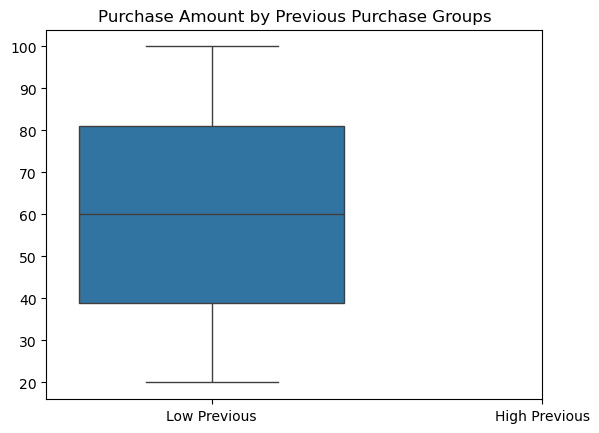

In [110]:
sns.boxplot(data=[group1, group2])
plt.xticks([0, 1], ['Low Previous', 'High Previous'])
plt.title("Purchase Amount by Previous Purchase Groups")
plt.show()


In [112]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['Previous Purchases'], df['Purchase Amount (USD)'])
print("Spearman Correlation:", corr)
print("p-value:", p_value)

if p_value < 0.05:
    print("✅ Significant correlation.")
else:
    print("❌ No significant correlation.")


Spearman Correlation: 0.008314955953859364
p-value: 0.6036830945527644
❌ No significant correlation.


In [72]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Log_Purchase
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,3.998179
std,1125.977353,15.207589,23.685392,0.716223,14.447125,0.450113
min,1.000000,18.000000,20.000000,2.500000,1.000000,2.995732
25%,975.750000,31.000000,39.000000,3.100000,13.000000,3.663562
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,4.094345
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,4.394449
max,3900.000000,70.000000,100.000000,5.000000,50.000000,4.605170


In [101]:
df['Previous Purchases'].value_counts()

Previous Purchases
31    97
21    96
14    92
24    91
3     91
4     91
48    90
47    90
5     87
6     87
18    84
20    83
45    83
42    83
1     83
30    82
11    82
33    82
40    82
39    81
32    81
28    80
12    79
34    79
25    79
19    78
27    78
37    78
46    78
26    77
50    77
10    76
15    73
23    73
2     72
44    72
36    71
41    70
16    70
38    70
29    69
13    69
8     67
17    67
7     65
22    65
9     65
43    64
35    63
49    58
Name: count, dtype: int64

In [103]:
df[['Previous Purchases', 'Purchase Amount (USD)']].corr()


,Previous Purchases,Purchase Amount (USD)
Previous Purchases,1.000000,0.008063
Purchase Amount (USD),0.008063,1.000000


## ------------------------------------------------------

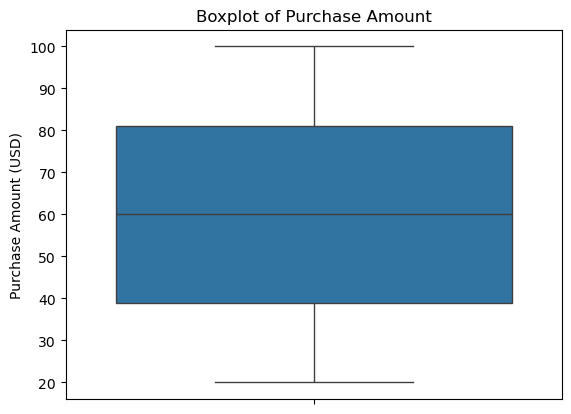

In [44]:
sns.boxplot(y=df['Purchase Amount (USD)'])
plt.title("Boxplot of Purchase Amount")
plt.show()


In [ ]:
sns.histplot(df['Purchase Amount (USD)'], kde=True)
plt.title("Histogram with KDE - Look for multiple peaks")
plt.show()


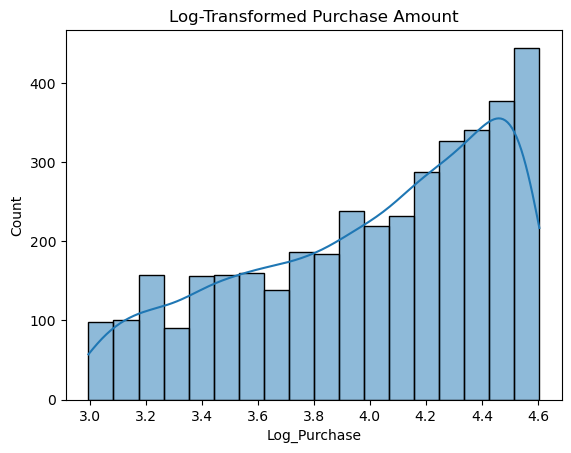

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Apply log transformation
df['Log_Purchase'] = np.log(df['Purchase Amount (USD)'])

# Plot histogram after transformation
sns.histplot(df['Log_Purchase'], kde=True)
plt.title("Log-Transformed Purchase Amount")
plt.show()


In [ ]:
df['Sqrt_Purchase'] = np.sqrt(df['Purchase Amount (USD)'])

sns.histplot(df['Sqrt_Purchase'], kde=True)
plt.title("Square Root-Transformed Purchase Amount")
plt.show()


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df['Log_Purchase'])  # Or Sqrt_Purchase
print("Shapiro-Wilk p-value:", p)
if p > 0.05:
    print("✅ Likely normal after transformation")
else:
    print("❌ Still not normal")


## ------------------------------------------

# Customer Segmentation

In [131]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 25, 35, 50, 100], labels=['<25', '25-35', '35-50', '50+'])

## Average Spend by Age Group and Gender

C:\Users\adars\AppData\Local\Temp\ipykernel_9224\1849384032.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = df.groupby(['age_group', 'Gender'])['Purchase Amount (USD)'].median().reset_index()


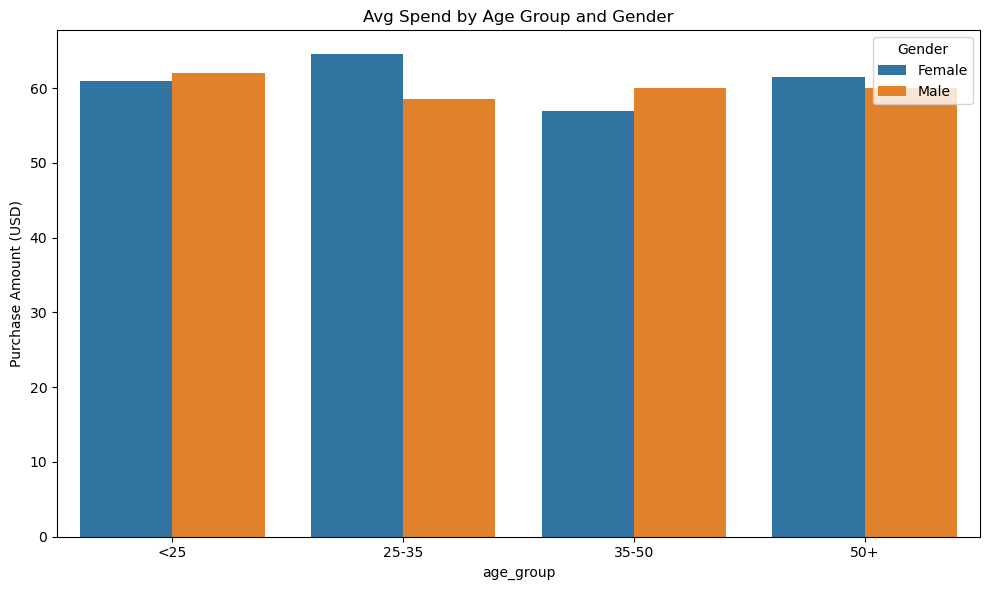

In [143]:
segment_summary = df.groupby(['age_group', 'Gender'])['Purchase Amount (USD)'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='age_group', y='Purchase Amount (USD)', hue= 'Gender',data=segment_summary)
plt.title("Avg Spend by Age Group and Gender")
plt.tight_layout()
plt.show()

## Subscription Status vs Spend

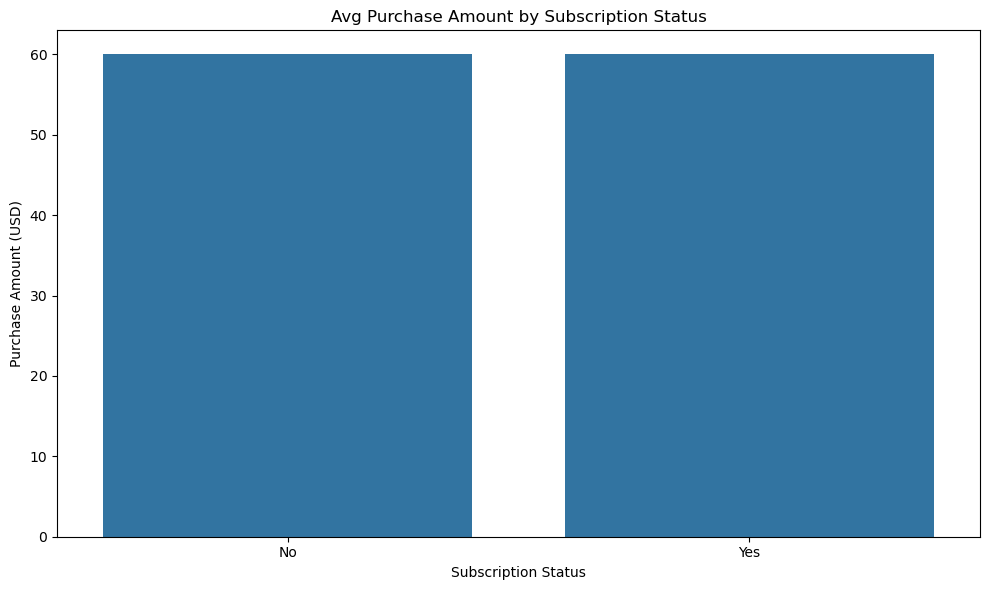

In [170]:
sub_summary = df.groupby('Subscription Status')['Purchase Amount (USD)'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Subscription Status', y='Purchase Amount (USD)', data= sub_summary)
plt.title('Avg Purchase Amount by Subscription Status')
plt.tight_layout()
plt.show()

In [178]:
dis_summary = df.groupby('Discount Applied')['Purchase Amount (USD)'].median().reset_index()

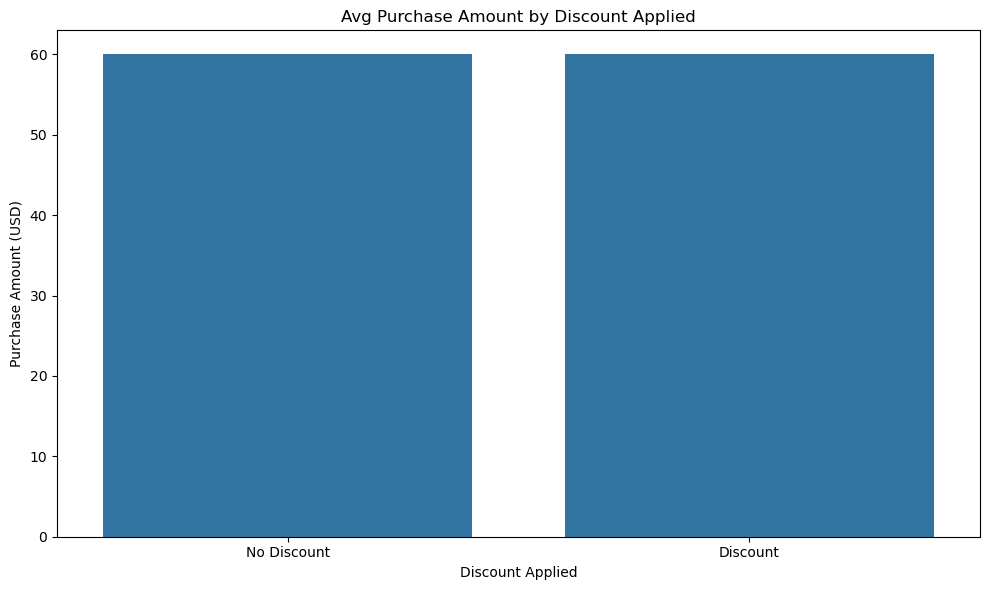

In [188]:
dis_summary = df.groupby('Discount Applied')['Purchase Amount (USD)'].median().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data= dis_summary)
plt.title('Avg Purchase Amount by Discount Applied')
plt.xticks([0, 1], ['No Discount', 'Discount'])

plt.tight_layout()
plt.show()

In [195]:

df.groupby('Discount Applied')['Purchase Amount (USD)'].count()


Discount Applied
No     2223
Yes    1677
Name: Purchase Amount (USD), dtype: int64

In [21]:
category_rating = df.groupby('Category')['Review Rating'].median().sort_values(ascending=False)
print('category_rating')

category_rating


In [23]:
category_rating

Category
Accessories    3.8
Footwear       3.8
Outerwear      3.8
Clothing       3.7
Name: Review Rating, dtype: float64

In [27]:
# Group by Item Purchased and calculate mean Review Rating
item_rating = df.groupby('Item Purchased')['Review Rating'].median().sort_values(ascending=False)

print(item_rating)


Item Purchased
Sandals       3.95
Hat           3.90
Boots         3.90
Skirt         3.90
Gloves        3.90
Jewelry       3.80
Sweater       3.80
Sneakers      3.80
T-shirt       3.80
Handbag       3.80
Coat          3.80
Hoodie        3.70
Jacket        3.70
Belt          3.70
Pants         3.70
Shoes         3.70
Shorts        3.70
Dress         3.70
Socks         3.70
Blouse        3.70
Backpack      3.70
Jeans         3.65
Scarf         3.60
Sunglasses    3.60
Shirt         3.50
Name: Review Rating, dtype: float64


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 items
top_items = item_rating_df.head(10)

top_items

Item Purchased
Sandals     3.95
Hat         3.90
Boots       3.90
Skirt       3.90
Gloves      3.90
Jewelry     3.80
Sweater     3.80
Sneakers    3.80
T-shirt     3.80
Handbag     3.80
Name: Review Rating, dtype: float64

In [33]:
import numpy as np

df['Log_Purchase'] = np.log1p(df['Purchase Amount (USD)'])  # log1p safely handles 0 values


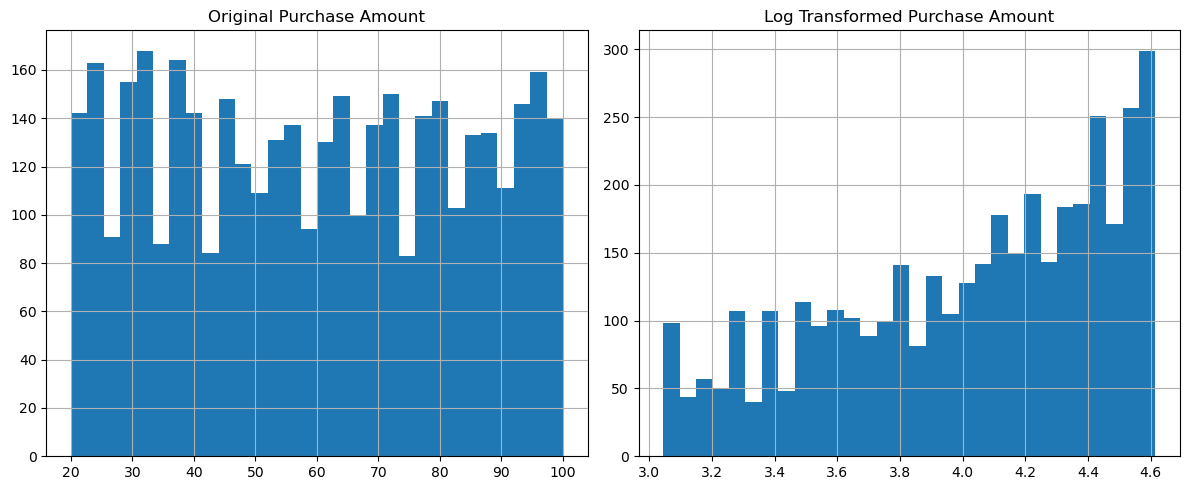

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Purchase Amount (USD)'].hist(bins=30)
plt.title("Original Purchase Amount")

plt.subplot(1, 2, 2)
df['Log_Purchase'].hist(bins=30)
plt.title("Log Transformed Purchase Amount")

plt.tight_layout()
plt.show()


In [37]:
from scipy.stats import shapiro

stat, p = shapiro(df['Log_Purchase'])
print("Shapiro-Wilk p-value:", p)

if p > 0.05:
    print("Log_Purchase is normally distributed.")
else:
    print("Log_Purchase is not normally distributed.")


Shapiro-Wilk p-value: 1.570574747615912e-38
Log_Purchase is not normally distributed.


In [45]:
col_to_test = ['Age', 'Purchase Amount (USD)',	'Review Rating',	'Previous Purchases',	'Log_Purchase' ]


for col in col_to_test:
    stat, p = shapiro(df[col])
    print(f"{col}: p-value = {p}")
    if p < 0.05:
        print(f"→ {col} is NOT normally distributed.\n")
    else:
        print(f"→ {col} IS normally distributed.\n")

Age: p-value = 4.393862623578557e-33
→ Age is NOT normally distributed.

Purchase Amount (USD): p-value = 1.815579163868232e-34
→ Purchase Amount (USD) is NOT normally distributed.

Review Rating: p-value = 6.499243704155826e-33
→ Review Rating is NOT normally distributed.

Previous Purchases: p-value = 2.344693304573732e-33
→ Previous Purchases is NOT normally distributed.

Log_Purchase: p-value = 1.570574747615912e-38
→ Log_Purchase is NOT normally distributed.



In [47]:
from scipy.stats import kruskal

group1 = df[df['Review Rating'] == 5]['Purchase Amount (USD)']
group2 = df[df['Review Rating'] == 4]['Purchase Amount (USD)']
group3 = df[df['Review Rating'] == 3]['Purchase Amount (USD)']

stat, p = kruskal(group1, group2, group3)
print("p-value:", p)


p-value: 0.3507899125856292
